In [76]:
import numpy as np 
import xarray as xr
import matplotlib.pyplot as plt
import os
import subprocess
import pickle

In [77]:
file = '/localdrive/drive10/jj/mdtf/inputdata/model/ERA5.MTPR.DEG10.001/6hr/ERA5.MTPR.DEG10.001.PRECT.6hr.nc'
ds = xr.open_dataset(file)
ds.close()

In [ ]:
file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_ERA5.TP.DEG10.001_2008_2012/etc_composites/tmp/RUNDIR/tmprun/read_tmprun/composites.pkl'
tp_deg10 = pickle.load(open(file,'rb'))

file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_ERA5.MTPR.DEG10.001_2008_2012/etc_composites/tmp/RUNDIR/tmprun/read_tmprun/composites.pkl'
mtpr_deg10 = pickle.load(open(file,'rb'))

file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_ERA5.TP.DEG15.001_2008_2012/etc_composites/tmp/RUNDIR/tmprun/read_tmprun/composites.pkl'
tp_deg15 = pickle.load(open(file,'rb'))

file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_ERA5.MTPR.DEG15.001_2008_2012/etc_composites/tmp/RUNDIR/tmprun/read_tmprun/composites.pkl'
mtpr_deg15 = pickle.load(open(file,'rb'))

In [ ]:
hemis = 'SH'; lm = 'ocean'; season='warm'; var='tp'; 

x = tp_deg10['x']
y = tp_deg10['y']

tmp = tp_deg10[hemis][lm][season][var]
tp_10 = tmp['area_sum']/tmp['area_cnt']

tmp = mtpr_deg10[hemis][lm][season][var]
mtpr_10 = tmp['area_sum']/tmp['area_cnt']

tmp = tp_deg15[hemis][lm][season][var]
tp_15 = tmp['area_sum']/tmp['area_cnt']

tmp = mtpr_deg15[hemis][lm][season][var]
mtpr_15 = tmp['area_sum']/tmp['area_cnt']

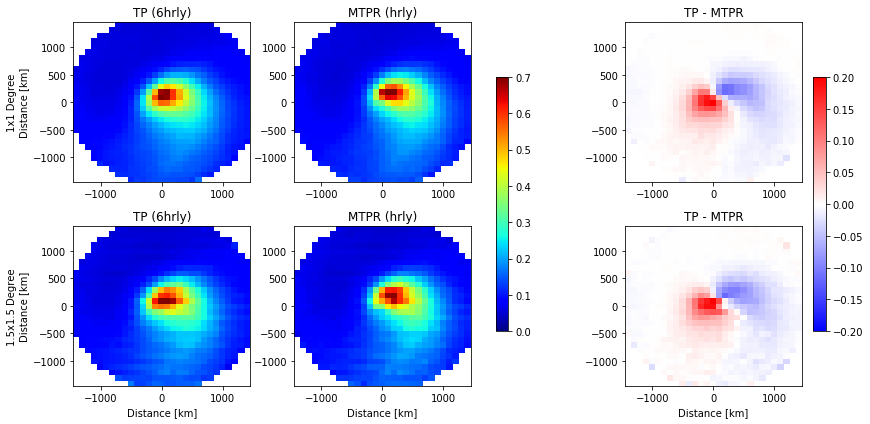

In [91]:
cmap='jet'
plt.figure(figsize=(12,6))

ax1=plt.subplot(2,3,1)
pc = plt.pcolormesh(x, y, tp_10, cmap=cmap, vmin=0, vmax=0.7)
# plt.colorbar()
plt.title('TP (6hrly)')
plt.ylabel('1x1 Degree\nDistance [km]')

ax2=plt.subplot(2,3,2)
plt.pcolormesh(x, y, mtpr_10, cmap=cmap, vmin=0, vmax=0.7)
# plt.colorbar()
plt.title('MTPR (hrly)')

ax12=plt.subplot(2,3,3)
vmax=0.2
plt.pcolormesh(x, y, tp_10 - mtpr_10, cmap='bwr', vmin=-vmax, vmax=vmax)
# plt.colorbar()
plt.title('TP - MTPR')

ax3=plt.subplot(2,3,4)
plt.pcolormesh(x, y, tp_15, cmap=cmap, vmin=0, vmax=0.7)
# plt.colorbar()
plt.title('TP (6hrly)')
plt.ylabel('1.5x1.5 Degree\nDistance [km]')
plt.xlabel('Distance [km]')

ax4=plt.subplot(2,3,5)
plt.pcolormesh(x, y, mtpr_15, cmap=cmap, vmin=0, vmax=0.7)
# plt.colorbar()
plt.title('MTPR (hrly)')
plt.xlabel('Distance [km]')

ax34=plt.subplot(2,3,6)
vmax=0.2
pc_diff = plt.pcolormesh(x, y, tp_15 - mtpr_15, cmap='bwr', vmin=-vmax, vmax=vmax)
# plt.colorbar()
plt.title('TP - MTPR')
plt.xlabel('Distance [km]')

plt.tight_layout()
plt.colorbar(pc, ax=[ax1,ax2, ax3, ax4], orientation='vertical', shrink=0.7)
plt.colorbar(pc_diff, ax=[ax12,ax34], orientation='vertical', shrink=0.7)

plt.show()